# **Naive Bayes Classifier**

**🧠 Question:
Use the 20 Newsgroups dataset from sklearn.datasets to build a text classification model using a Naive Bayes classifier. Your tasks are:**

##### 1) Load the 20newsgroups dataset with a subset of categories (e.g., 'sci.space', 'rec.sport.baseball', 'comp.graphics').

##### 2) Preprocess the text data using TF-IDF vectorization.

##### 3) Split the data into training and test sets (80-20 split).

##### 4) Train a Multinomial Naive Bayes classifier.

##### 5) Evaluate the model using accuracy, confusion matrix, and classification report.

##### 6) (Optional) Print a few sample predictions with their actual categories.

In [2]:
import pandas as pd 
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
categories = ['sci.space', 'rec.sport.baseball', 'comp.graphics']

newsgroups_data = fetch_20newsgroups(subset = 'all' , categories=categories, remove=('headers', 'footers', 'quotes'))

In [4]:
tf = TfidfVectorizer()

In [5]:
X = tf.fit_transform(newsgroups_data.data)

In [6]:
y = newsgroups_data.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [8]:
nb = MultinomialNB()

In [9]:
nb.fit(X_train, y_train)

MultinomialNB()

In [10]:
y_pred_n = nb.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred_n)

0.9035532994923858

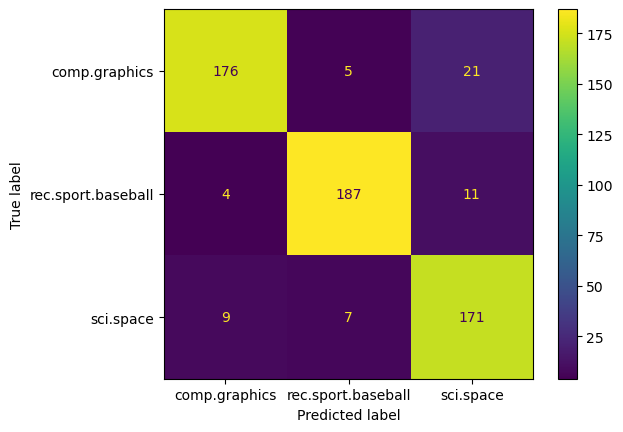

In [12]:
cm = confusion_matrix(y_test, y_pred_n)
cmd = ConfusionMatrixDisplay(cm, display_labels=newsgroups_data.target_names)
cmd.plot()

In [13]:
print(classification_report(y_test, y_pred_n))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       202
           1       0.94      0.93      0.93       202
           2       0.84      0.91      0.88       187

    accuracy                           0.90       591
   macro avg       0.90      0.90      0.90       591
weighted avg       0.91      0.90      0.90       591



In [14]:
for i in range(5):
    print(newsgroups_data.data[i])
    print("Actual:", newsgroups_data.target_names[y_test[i]])
    print("Predicted:", newsgroups_data.target_names[y_pred_n[i]])


I know it's only wishful thinking, with our current President,
but this is from last fall:

     "Is there life on Mars?  Maybe not now.  But there will be."
        -- Daniel S. Goldin, NASA Administrator, 24 August 1992

-- Ken Jenks, NASA/JSC/GM2, Space Shuttle Program Office
      kjenks@gothamcity.jsc.nasa.gov  (713) 483-4368
Actual: rec.sport.baseball
Predicted: rec.sport.baseball

Here's one I remember: (sort of)
Yogi's asleep in a hotel room late at night and gets a call from someone.
After he answers the phone the person at the other end asks if he woke Yogi
up. Yogi answered, "No, the phone did."
Actual: comp.graphics
Predicted: comp.graphics
Archive-name: space/acronyms
Edition: 8

Acronym List for sci.astro, sci.space, and sci.space.shuttle:
Edition 8, 1992 Dec 7
Last posted: 1992 Aug 27

This list is offered as a reference for translating commonly appearing
acronyms in the space-related newsgroups.  If I forgot or botched your
favorite acronym, please let me know!  Also, i